<a href="https://colab.research.google.com/github/bhavita/CovidPrediction/blob/IEEEDataSetCreator/CovidXrayDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset chestxray

Cloning into 'chestxray'...
remote: Enumerating objects: 3599, done.
remote: Total 3599 (delta 0), reused 0 (delta 0), pack-reused 3599
Receiving objects: 100% (3599/3599), 712.16 MiB | 40.90 MiB/s, done.
Resolving deltas: 100% (1424/1424), done.
Checking out files: 100% (1123/1123), done.


In [5]:
import pandas as pd

In [7]:
METADATA_FILE_PATH = "chestxray/metadata.csv"
IMAGE_PATH = "chestxray/images"

In [14]:
df = pd.read_csv(METADATA_FILE_PATH)
df.head(5)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [16]:
import os
import shutil

In [21]:
DATA_SET_COVID = "DataSet/Covid"
if not os.path.exists(DATA_SET_COVID):
  os.makedirs(DATA_SET_COVID)
  print("Creating DataSet for Covid")

Creating DataSet for Covid


In [31]:
covid_cases = 0

#Iterate over all rows and find out profiles having xray and covid-19 
images = []

for(i,row) in df.iterrows():
  if(row["finding"] == "COVID-19" and row["view"]=="PA"):
    filename=row["filename"]
    image_path=os.path.join(IMAGE_PATH,filename)
    target_path= os.path.join(DATA_SET_COVID,filename)
    shutil.copy2(image_path,target_path)
    images.append(target_path)
    covid_cases+=1;

print("Added dataset of %d cases" % (covid_cases))


Added dataset of 180 cases


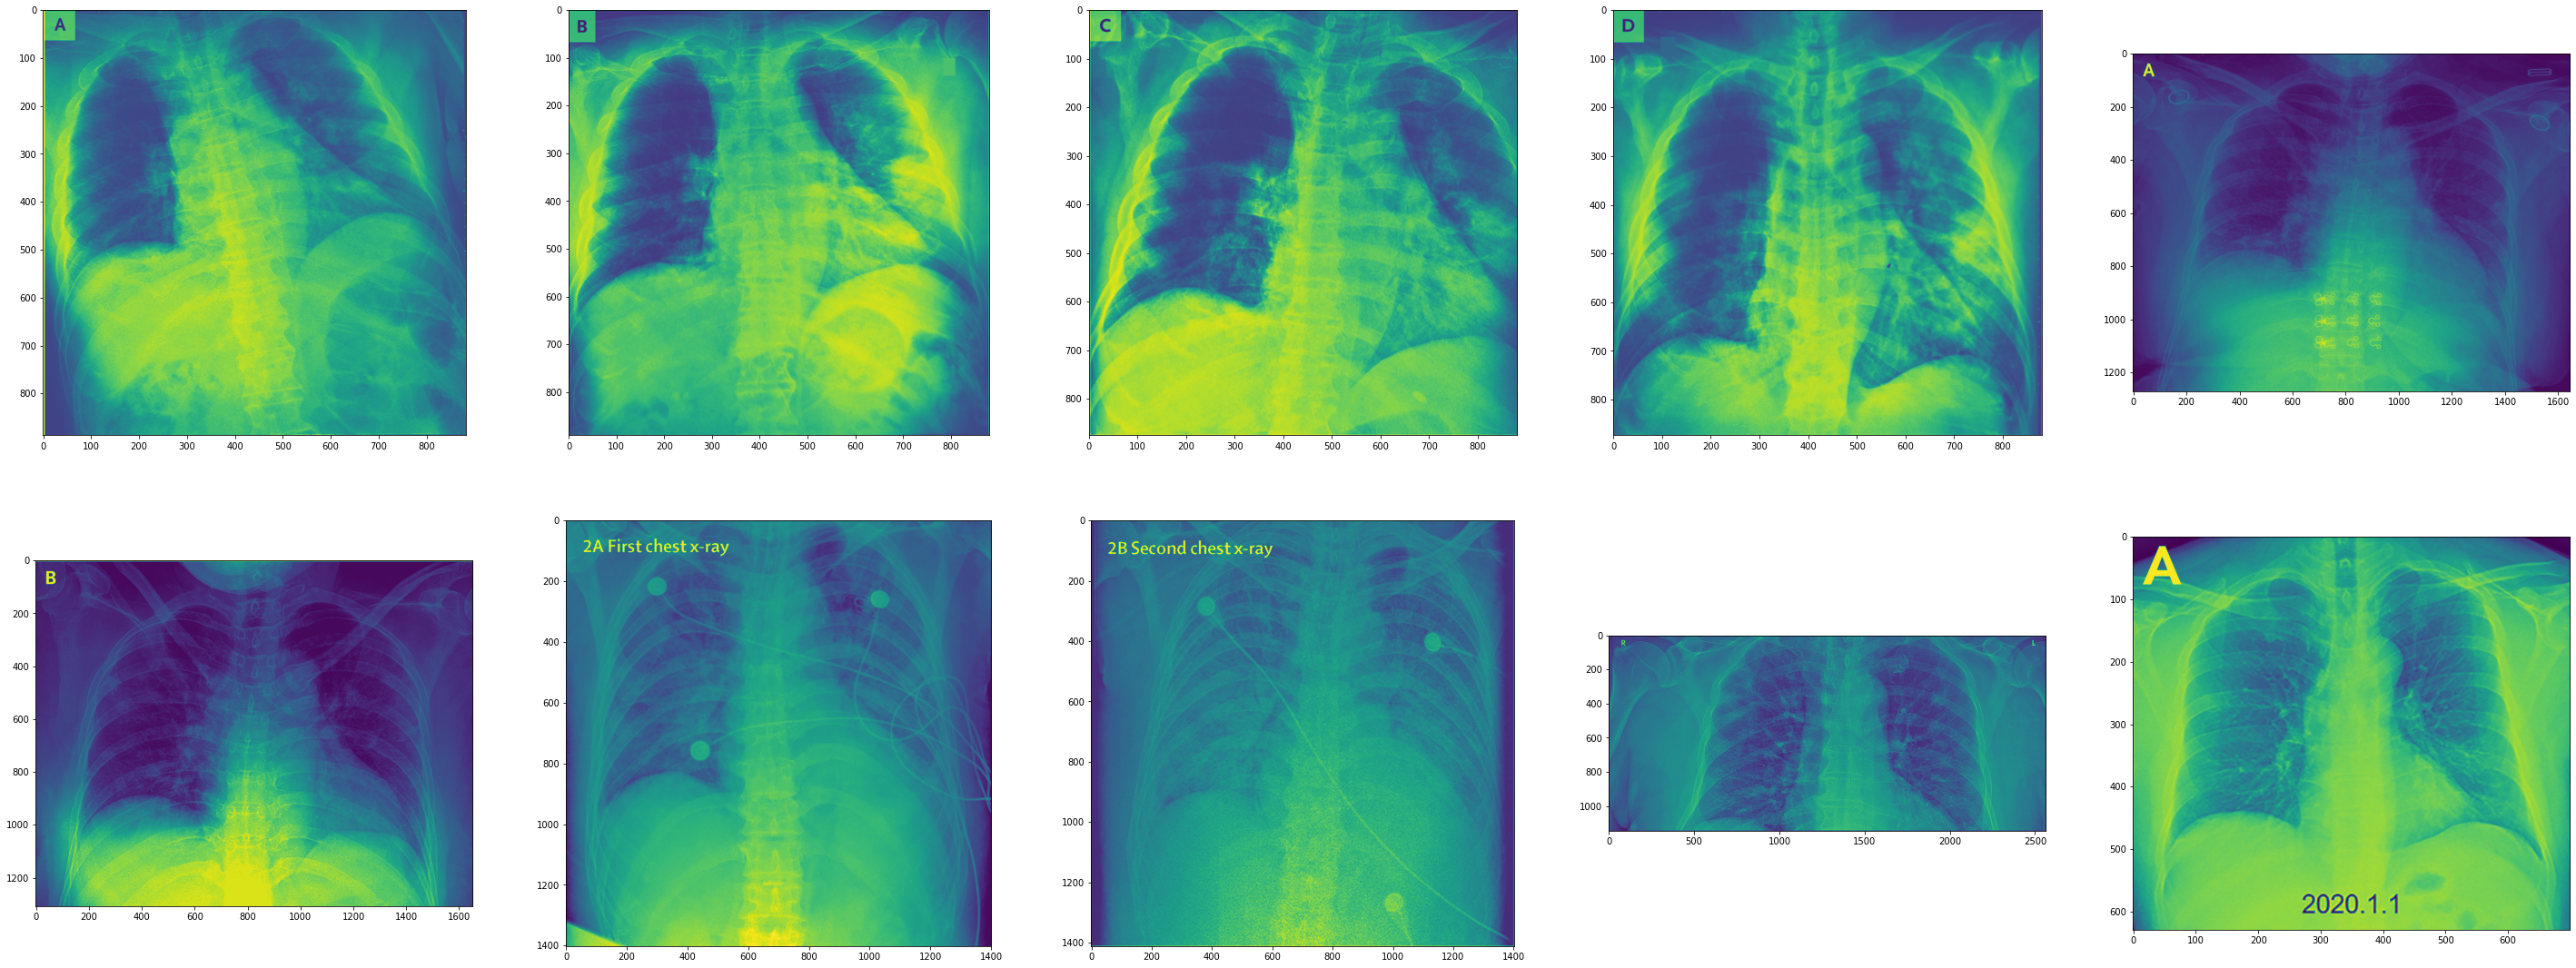

In [51]:
from matplotlib import pyplot as plt
import cv2

f = plt.figure(figsize=(50,50)) # specifying the overall grid size

for i in range(10):
  img = cv2.imread(images[i])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  f.add_subplot(5,5,i+1);
  plt.imshow(gray)

plt.show(block=True)